<a href="https://colab.research.google.com/github/aditya0589/notebooks/blob/main/AI%20Engineering%20/Langchain/LC01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LC01 INTRODUCTION TO LANGCHAIN**

Langchain is an open-source framework for developing applications powered by Large Language models (LLMS).

The framework was released in 2022 by Harrison Chase. Soon became the fastest growing open-source project on Github.

## **Advantages of Langchain**

1. **Concept of chains**: Langchain allows us to chain different components together (the output of one component is sent as an input to the next component). This way, its easy to develop AI workflows

2. **Model agnostic developement**: Your application code is independent of the LLM powering it. You can shift between different LLMs easily without changing much code. Langchain supports multiple vendors including **Google**, **OpenAI**, **Groq** and **Huggingface**.
3. **Complete ecosystem**: Langchain provides you the complete ecosystem to build complete applications from data extraction to generating insights.
4. **Memory and state handling**: Provides support for LLM memory and state transitions.


## **What can you build using Langchain**

1. Conversational Chatbots
2. Retrieval Augmented Generation
3. Agents
4. Workflow automation
5. Summarization



## **Langchain components**

There are different components in langchain

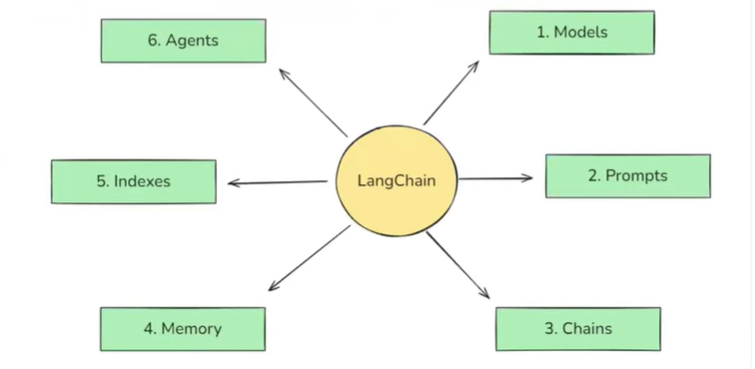


--------------------------------------------------------------------------
### **Models**:

In langchain, **models** are the core interfaces with which you interact with a large language model.

Below are given two code cells for interacting with two different commertial LLM models from OpenAI and Anthropic.

You dont need to run these cells, just observe the code

In [ ]:
from openai import OpenAI

client = OpenAI()

completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {
            "role": "user",
            "content": "Write a haiku about recursion in programming."
        }
    ]
)

print(completion.choices[0].message)


The above code is used to chat with the **gpt-4o-mini** model using the **OpenAI** api

In [ ]:
import anthropic

client = anthropic.Anthropic()

message = client.messages.create(
    model="claude-3-5-sonnet-20241022",
    max_tokens=1000,
    temperature=0,
    system="You are a world-class poet. Respond only with short poems.",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Why is the ocean salty?"
                }
            ]
        }
    ]
)

print(message.content)


The above is the code to interact with the **claude-3-5-sonnet-20241022** model using the **Anthropic** api


You find that the syntax for the two APIs are very different from each other.


Now let us do the same code in Langchain

First is the OpenAI model

In [ ]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

load_dotenv()

model = ChatOpenAI(model="gpt-4", temperature=0)

result = model.invoke("Now divide the result by 1.5")

print(result.content)


The Antropic model

In [ ]:
from langchain_anthropic import ChatAnthropic
from dotenv import load_dotenv

load_dotenv()

model = ChatAnthropic(model="claude-3-opus-20240229")

result = model.invoke("Hi who are you")

print(result.content)


You see that the two snippets are exactly the same, except for the names of the models. This is the power of Langchain.

The langchain models components thus standardizes the interface for interacting with LLMs.


In langchain, you can interact with two kinds of models:
1. Language models
2. Embedding models

----------------------------------------------------------------------------

### **Prompts**

They are the text inputs provided to a large language model

The output obtained by a large language model depends heavily on the prompt which it is queried with. A slight change in the input prompt leads to a huge change in the obtained output.

In [1]:
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate.from_template("Summarize {topic} in {emotion} tone")

print(prompt.format(topic="cricket", emotion="fun"))

Summarize cricket in fun tone


Langchain provides an efficient prompt template using which we can create dynamic and reusable prompts

### **Chains**

Chains are used to build pipelines in Langchain.

It is the most fundamental component which makes langchain unique and relevant


Let us consider a task of summarizing an english text in espaniol.

We take two LLMs here, one for translating the english text to espaniol and the other to summarize this new espaniol text.

the workflow is as follows:

text(english) --> LLM --> translation(espaniol) --> LLM --> summary

Here, each component in the workflow is a langchain component. The chaining of these components allows us to build systems easily

-------------------------------------------------------------------------

### **Indexes**

Indexes connect your application with external knowledge - like PDFs, websites or Databases

There are four types of indexes:
1. Document loader
2. Text splitters
3. Vector Store
4. Retrievers

These are used in the context of Retrieval Augmented Generation (RAG)

--------------------------------------------------------------------

### **Memory**
LLM API calls are stateless. That means that the calls you make are independent to each other and there is no memory of the previous calls.

ex:

Human : Who is Vladimir Putin

AI:     Validimir Putin is the president of the Russian Federation

now:

Human : How old is he

AI: As an AI, i dont have personal information about individuals unless it is shared with me during the course of our conversation.

Human: His age is 80 years

AI: I got it. However i dont understand whose age you are referring to. Please specify the name of the person for better understanding.


You get the point. The LLM fails to remember the previous questions. This is a major problem with LLM APIs

Langchain solves this problem by providing various memory tools using which we can store these data and give memory to our LLM

-------------------------------------------------------------------------

### **Agents**

Providing tools to AI models so that it can use them to perform tasks

The model sees the goal and decided which tools to use, then uses them to solve the problem in order to reach the goal

ex: AI email agents send emails automatically
    <br>
    AI agents book tickets and reserve tables at restaurants automatically

<br>
Agentic AI is the hotspot of today and Langchain helps you build these agents